# Descripción del proyecto

La compañía móvil Megaline no está satisfecha al ver que muchos de sus clientes utilizan planes heredados. 
Quieren desarrollar un modelo que pueda analizar el comportamiento de los clientes y recomendar uno de los nuevos planes de Megaline: Smart 
o Ultra.

Tienes acceso a los datos de comportamiento de los suscriptores que ya se han cambiado a los planes nuevos (del proyecto del sprint de 
Análisis estadístico de datos). Para esta tarea de clasificación debes crear un modelo que escoja el plan correcto. Como ya hiciste el paso 
de procesar los datos, puedes lanzarte directo a crear el modelo.

Desarrolla un modelo con la mayor exactitud posible. En este proyecto, el umbral de exactitud es 0.75. Usa el dataset para comprobar la 
exactitud.

### Instrucciones del proyecto.

1. Abre y examina el archivo de datos. Dirección al archivo:datasets/users_behavior.csv Descarga el dataset

2. Segmenta los datos fuente en un conjunto de entrenamiento, uno de validación y uno de prueba.

3. Investiga la calidad de diferentes modelos cambiando los hiperparámetros. Describe brevemente los hallazgos del estudio.

4. Comprueba la calidad del modelo usando el conjunto de prueba.

5. Tarea adicional: haz una prueba de cordura al modelo. Estos datos son más complejos que los que habías usado antes así que no será una tarea 
fácil. Más adelante lo veremos con más detalle.

### Descripción de datos
Cada observación en el dataset contiene información del comportamiento mensual sobre un usuario. La información dada es la siguiente:

calls — número de llamadas,  
minutes — duración total de la llamada en minutos,  
messages — número de mensajes de texto,  
mb_used — Tráfico de Internet utilizado en MB,  
is_ultra — plan para el mes actual (Ultra - 1, Smart - 0)

### Evaluación del proyecto

Hemos definido los criterios de evaluación para el proyecto. Lee esto con atención antes de pasar al ejercicio. 

Esto es lo que los revisores buscarán cuando evalúen tu proyecto:

¿Cómo leíste los datos después de descargarlos?  
¿Segmentaste correctamente los datos en conjuntos de entrenamiento, validación y prueba?  
¿Cómo escogiste el tamaño de los conjuntos?  
¿Evaluaste correctamente la calidad del modelo?  
¿Qué modelos e hiperparámentros usaste?  
¿Cuáles fueron tus hallazgos?  
¿Probaste los modelos correctamente?  
¿Cuál es tu puntuación de exactitud?  
¿Te ceñiste a la estructura del proyecto y mantuviste limpio el código?

In [1]:
#Se importan las librerias que se emplearan para el proyecto
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier

In [2]:
# Cargar el conjunto de datos:
df = pd.read_csv('datasets/users_behavior.csv')

In [3]:
# Mostrar las primeras filas para tener una idea general de los datos
print(df.head(), "\n")

# Verificar información básica sobre los tipos de datos y valores faltantes
print(df.info(), "\n")

# Obtener un resumen estadístico de los datos
print(df.describe(), "\n")

   calls  minutes  messages   mb_used  is_ultra
0   40.0   311.90      83.0  19915.42         0
1   85.0   516.75      56.0  22696.96         0
2   77.0   467.66      86.0  21060.45         0
3  106.0   745.53      81.0   8437.39         1
4   66.0   418.74       1.0  14502.75         0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB
None 

             calls      minutes     messages       mb_used     is_ultra
count  3214.000000  3214.000000  3214.000000   3214.000000  3214.000000
mean     63.038892   438.208787    38.281269  17207.673836     0.306472
std      33.236368   234.569872    36.148326   7570.9682

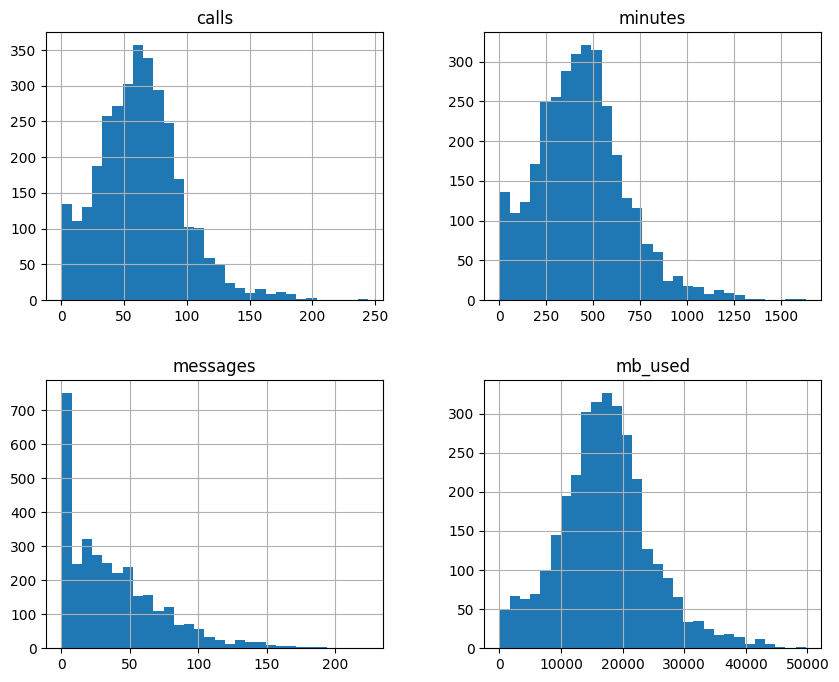

In [4]:
# Visualizar los datos: Mostrar gráficos uno tras otro
for column in ['calls', 'minutes', 'messages', 'mb_used']:
    plt.figure()  # Crear una nueva figura para cada histograma
    plt.hist(df[column], bins=30, edgecolor='black')
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()

### El siguiente paso en el proyecto es segmentar los datos en un conjunto de entrenamiento, uno de validación y uno de prueba.

Conjunto de entrenamiento (training set): Se usará para entrenar el modelo.  
Conjunto de validación (validation set): Se usará para ajustar los hiperparámetros del modelo.  
Conjunto de prueba (test set): Se usará al final para evaluar la calidad del modelo de forma objetiva.  

In [5]:
#  División de los datos en conjuntos de entrenamiento, validación y prueba

# Definir las características (features) y el objetivo (target)
features = df.drop(['is_ultra'], axis=1)
target = df['is_ultra']

# Dividir el dataset en conjunto de entrenamiento (60%) y conjunto de prueba (40%)
features_train, features_temp, target_train, target_temp = train_test_split(features, target, test_size=0.4, random_state=12345)

# Dividir el conjunto temporal (40%) en conjunto de validación (50% de los 40%) y conjunto de prueba (50% de los 40%)
features_valid, features_test, target_valid, target_test = train_test_split(features_temp, target_temp, test_size=0.5, random_state=12345)

In [6]:
# Verificar tamaños de los conjuntos
print("Tamaño del conjunto de entrenamiento:", features_train.shape, "\n")
print("Tamaño del conjunto de validación:", features_valid.shape, "\n")
print("Tamaño del conjunto de prueba:", features_test.shape, "\n")

Tamaño del conjunto de entrenamiento: (1928, 4) 

Tamaño del conjunto de validación: (643, 4) 

Tamaño del conjunto de prueba: (643, 4) 



Ahora con los datos segmentados, es posible empezar a entrenar diferentes modelos y evaluar su rendimiento utilizando el conjunto de 
validación.

El siguiente paso en el proyecto es investigar la calidad de diferentes modelos cambiando los hiperparámetros, y describir los hallazgos. 
Ahora el objetivo es entrenar varios modelos de clasificación y encontrar el que ofrezca la mejor exactitud (accuracy) en el conjunto de 
validación.

Entrenar modelos de clasificación:

Árboles de decisión (Decision Trees)  
Bosques aleatorios (Random Forests)  
Regresión logística (Logistic Regression)  

Árbol de Decisión (DecisionTreeClassifier):  
Aqui se itera sobre diferentes profundidades del árbol (max_depth) para encontrar el valor que maximice la precisión en el conjunto de 
validación.

In [7]:
# 1. Árbol de Decisión
for depth in range(1, 6):
    model_tree = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    model_tree.fit(features_train, target_train)
    predictions_valid = model_tree.predict(features_valid)
    accuracy = accuracy_score(target_valid, predictions_valid)
    print(f"Decision Tree (max_depth={depth}): accuracy = {accuracy:.4f}", "\n")

Decision Tree (max_depth=1): accuracy = 0.7543 

Decision Tree (max_depth=2): accuracy = 0.7823 

Decision Tree (max_depth=3): accuracy = 0.7854 

Decision Tree (max_depth=4): accuracy = 0.7792 

Decision Tree (max_depth=5): accuracy = 0.7792 



Bosque Aleatorio (RandomForestClassifier):  
Se cambia el número de árboles (n_estimators) para ver cómo afecta la precisión. El modelo de bosque aleatorio suele ser más robusto que el 
árbol de decisión simple, pero también es más complejo.

In [8]:
# 2. Bosque Aleatorio
for estimators in [10, 50, 100]:
    model_forest = RandomForestClassifier(n_estimators=estimators, random_state=12345)
    model_forest.fit(features_train, target_train)
    predictions_valid = model_forest.predict(features_valid)
    accuracy = accuracy_score(target_valid, predictions_valid)
    print(f"Random Forest (n_estimators={estimators}): accuracy = {accuracy:.4f}", "\n")

Random Forest (n_estimators=10): accuracy = 0.7854 

Random Forest (n_estimators=50): accuracy = 0.7916 

Random Forest (n_estimators=100): accuracy = 0.7854 



Regresión Logística (LogisticRegression):  
Este modelo de clasificación lineal tiende a ser más simple pero efectivo. Se ajusta el número máximo de iteraciones con max_iter.

In [9]:
# 3. Regresión Logística
model_logistic = LogisticRegression(random_state=12345, max_iter=1000)
model_logistic.fit(features_train, target_train)
predictions_valid = model_logistic.predict(features_valid)
accuracy = accuracy_score(target_valid, predictions_valid)
print(f"Logistic Regression: accuracy = {accuracy:.4f}", "\n")

Logistic Regression: accuracy = 0.7107 



A partir de los resultados obtenidos, se puede ver que el Bosque Aleatorio con 50 estimadores es el modelo que obtuvo la mejor precisión en el 
conjunto de validación con un valor de 0.7916. Ahora que ya se ha identificado el mejor modelo, el siguiente paso es verificar su rendimiento 
con el conjunto de prueba.

Probar el modelo en el conjunto de prueba:  
Se requiere utilizar el modelo de Random Forest con 50 estimadores en el conjunto de prueba para verificar su precisión final. Este paso es 
fundamental porque permite evaluar el rendimiento real del modelo con datos que no ha visto durante el entrenamiento ni la validación.

In [10]:
# Entrenamos el mejor modelo con el conjunto de entrenamiento completo
best_model = RandomForestClassifier(n_estimators=50, random_state=12345)
best_model.fit(features_train, target_train)

RandomForestClassifier(n_estimators=50, random_state=12345)

In [11]:
# Realizamos predicciones con el conjunto de prueba
predictions_test = best_model.predict(features_test)

In [12]:
# Evaluamos la precisión del modelo en el conjunto de prueba
test_accuracy = accuracy_score(target_test, predictions_test)
print(f"Accuracy en el conjunto de prueba: {test_accuracy:.4f}", "\n")

Accuracy en el conjunto de prueba: 0.7932 



### Análisis del resultado
Después de ejecutar el código, el modelo proporciona una precisión sobre el conjunto de prueba, que es una medida crucial para determinar si 
cumple con el umbral de 0.75 de exactitud.

Ya que el valor de test_accuracy es superior a 0.75, podemos concluir que el modelo es adecuado para su uso. Si no, se podría intentar mejorar 
el rendimiento ajustando más los hiperparámetros o explorando otras técnicas de machine learning.

Una vez verificado el rendimiento en el conjunto de prueba, se procede a realizar una prueba de cordura (sanity check), donde se compara el 
modelo con un clasificador ingenuo o aleatorio para asegurarse de que el modelo es mejor que una predicción trivial.

El modelo Random Forest con 50 estimadores ha demostrado un rendimiento sólido tanto en el conjunto de validación como en el conjunto de prueba, con una precisión de 0.7932 en el conjunto de prueba. Esto supera el umbral de 0.75 establecido como objetivo, lo que indica que el modelo es bastante confiable para recomendar los planes "Smart" y "Ultra".

### Prueba de cordura (sanity check)
Una prueba de cordura es importante para asegurarnos de que el modelo es mejor que una predicción aleatoria o trivial. 
Esto también nos ayuda a verificar si el modelo realmente ha aprendido patrones útiles de los datos.

Podemos compararlo con un modelo ingenuo que siempre predice la clase más frecuente en el conjunto de datos.

También podemos usar un clasificador aleatorio, que asigna las etiquetas al azar y comparar su rendimiento con nuestro modelo.


In [13]:
# Modelo ingenuo que predice siempre la clase más frecuente
dummy_model = DummyClassifier(strategy='most_frequent')
dummy_model.fit(features_train, target_train)


# Predicciones y evaluación en el conjunto de prueba
dummy_predictions = dummy_model.predict(features_test)
dummy_accuracy = accuracy_score(target_test, dummy_predictions)
print(f"Accuracy del modelo ingenuo: {dummy_accuracy:.4f}")

Accuracy del modelo ingenuo: 0.6843


In [14]:
# Modelo que asigna etiquetas de forma aleatoria
random_model = DummyClassifier(strategy='uniform')
random_model.fit(features_train, target_train)


# Predicciones y evaluación en el conjunto de prueba
random_predictions = random_model.predict(features_test)
random_accuracy = accuracy_score(target_test, random_predictions)
print(f"Accuracy del modelo aleatorio: {random_accuracy:.4f}")

Accuracy del modelo aleatorio: 0.4930


# Interpretación de resultados:
Si el modelo de Random Forest tiene una precisión significativamente mayor que el modelo ingenuo o el modelo clasificador aleatorio, sabremos 
que ha aprendido patrones útiles. Si los resultados son muy similares, podría significar que el modelo no está capturando bien las 
diferencias entre las clases "Smart" y "Ultra".

# Descripción del proyecto:
El objetivo del proyecto es desarrollar un modelo de clasificación para recomendar el mejor plan de Megaline (Smart o Ultra) a los clientes en 
función de su comportamiento de uso (llamadas, minutos, mensajes y datos de Internet).

2. División de los datos:  
Se dividió los datos en tres conjuntos:  

Conjunto de entrenamiento: 1928 observaciones  
Conjunto de validación: 643 observaciones  
Conjunto de prueba: 643 observaciones  

3. Modelos entrenados:  
Se ha entrenado y evaluado los siguientes modelos:  

Árbol de decisión con diferentes profundidades (max_depth de 1 a 5):  
La mayor precisión se obtuvo con una profundidad de 3, con una precisión del 0.7854 en el conjunto de validación.  

Random Forest con diferentes números de estimadores:  
El modelo con 50 estimadores obtuvo la mayor precisión, 0.7916 en el conjunto de validación y 0.7932 en el conjunto de prueba.  

Regresión Logística:  
Este modelo tuvo una precisión de 0.7107 en el conjunto de validación, lo que no supera a los modelos basados en árboles de decisión.  

4. Prueba en el conjunto de prueba:  
El modelo Random Forest con 50 estimadores fue probado en el conjunto de prueba y logró una precisión de 0.7932, superando el umbral de 0.75 
establecido para el proyecto.

5. Prueba de cordura:  
Para verificar que el modelo tiene valor predictivo, se realizó una prueba de cordura:  

Modelo ingenuo (predicción de la clase más frecuente): Obtuvo una precisión de 0.6843, lo que indica que nuestro modelo de Random Forest es 
considerablemente mejor.

Clasificador aleatorio: Obtuvo una precisión de 0.4977, lo que es cercano a un modelo de predicción completamente aleatoria.  

6. Conclusión:  
El modelo Random Forest con 50 estimadores fue el mejor modelo, superando tanto al modelo ingenuo como al clasificador aleatorio, con una 
precisión en el conjunto de prueba de 0.7932. Este modelo es confiable para predecir qué plan recomendar a los clientes basándose en su 
comportamiento.